In [26]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np


In [27]:
#import data here 

train_data = pd.read_csv('./train_noclean_prices.csv')
test_data = pd.read_csv('./test_noclean_prices.csv')

#get correct data for X and y
y_train = train_data.loc[:,'price']
train_data = train_data.drop(columns='price')
num_features = len(train_data.columns)
features = list(train_data.columns[2:num_features])
X_train = train_data.loc[:,features]

features = list(test_data.columns[2:num_features])

X_test = test_data.loc[:,features]
test_labels = test_data.loc[:,'id']

test_labels = test_labels.to_frame()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
#random search using param grid for hyperparameters
kf = KFold(n_splits = 10, shuffle=True)

param_grid = {'bootstrap': [True, False],
 'criterion': ['gini', 'entropy'],
 'max_depth': [2, 5, 10, 20, 30, None],
 'max_features': ['auto', 'log2', 3, 8, None],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [50, 100, 200, 400, 600, 800, 1000, 1500]}
X = np.concatenate([X_train], axis= 0)
y = np.concatenate([y_train], axis= 0)


clf = RandomForestClassifier()  
rsearch = RandomizedSearchCV(estimator=clf, param_distributions=param_grid, cv=kf, n_iter = 1000, n_jobs = -1, verbose=10)
clf_model = rsearch.fit(X=X, y=y)

print(clf_model.best_params_, clf_model.best_score_)


Fitting 10 folds for each of 1000 candidates, totalling 10000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:   24.8s
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:   47.9s
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:  1.8min
/opt/conda/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 113 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done

In [29]:
print(clf_model.best_params_, clf_model.best_score_)
#params with prices added

{'n_estimators': 1500, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 20, 'criterion': 'gini', 'bootstrap': False} 0.5590341921892724


In [16]:
print(clf_model.best_params_, clf_model.best_score_)
#params without changing max features

{'n_estimators': 400, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': None, 'criterion': 'gini', 'bootstrap': False} 0.5590306740355995


In [30]:
#fit final model
params = {'n_estimators': 1500, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 20, 'criterion': 'gini', 'bootstrap': False}

clf = RandomForestClassifier()
clf.set_params(**params)
clf.fit(X,y)


RandomForestClassifier(bootstrap=False, max_depth=20, min_samples_split=5,
                       n_estimators=1500)

In [31]:
#train accuracy
y_pred1=clf.predict(X)
print(y_pred1)
print(accuracy_score(y, y_pred1))

[2 1 3 ... 3 3 1]
0.9900836690424543


In [32]:
#test accuracy predictoins
y_pred=clf.predict(X_test)

df = pd.DataFrame
test_labels['price'] = y_pred

test_labels['price'] = test_labels['price'].map(lambda x: int(x))

In [33]:
test_labels

,id,price
0,7715,2
1,13196,2
2,13194,2
3,4673,2
4,11325,1
...,...,...
4144,12921,4
4145,7174,1
4146,9240,3
4147,11663,1


In [34]:
#convert to csv 
test_labels.to_csv(r'./submission15.csv', index=False)

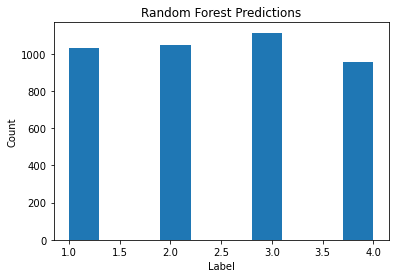

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
labels = pd.read_csv('./submission15.csv')
y_pred = labels.loc[:,'price']
plt.figure()
plt.hist(y_pred)
plt.title("Random Forest Predictions")
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()